# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [5]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Visão geral do dataframe
dataframe

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21
...,...,...
9995,25.204408,22
9996,12.006620,24
9997,17.178733,17
9998,21.983062,23


In [5]:
#Verificando se o dataframe possui algum campo vazio
dataframe.isna().sum()

normal      0
binomial    0
dtype: int64

In [10]:
#Análise descritiva dos dados
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf1d8df790>,
      dtype=object)

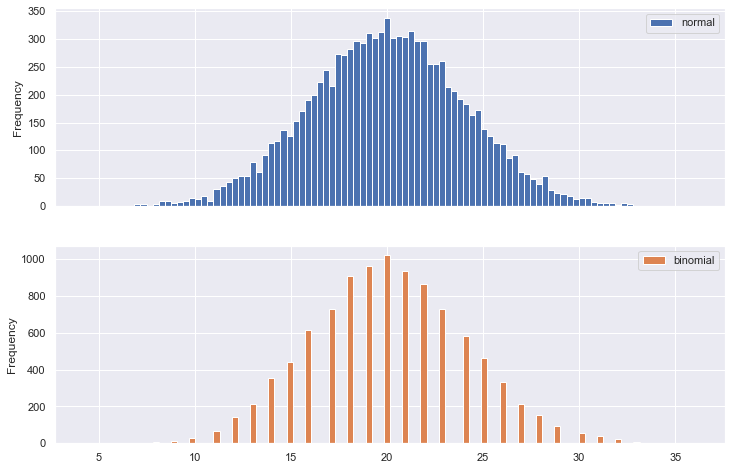

In [16]:
dataframe[["normal", "binomial"]].plot(bins=100, kind="hist", subplots=True)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [58]:
def q1():
    # Retorne aqui o resultado da questão 1.
    #A função quantile retorna o valor do quantil sobre o eixo solicitado
    aux1, aux2, aux3 = dataframe.quantile([0.25, 0.5, 0.75]).values
    q1_norm, q2_norm, q3_norm, q1_binom, q2_binom, q3_binom = (aux1[0], aux2[0], aux3[0], aux1[1], aux2[1], aux3[1])
    calc_quantis = (round(q1_norm - q1_binom, 3), round(q2_norm - q2_binom, 3), round(q3_norm - q3_binom, 3))
    return calc_quantis

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [117]:
def q2():
    # Retorne aqui o resultado da questão 2.
    media_normal = dataframe['normal'].mean()
    desvio = dataframe['normal'].std()
    prob_ecdf = ECDF(dataframe['normal'])
    calc_prob = float(round(prob_ecdf(media_normal + desvio), 3) - round(prob_ecdf(media_normal - desvio),3))
    return calc_prob

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [107]:
def q3():
    # Retorne aqui o resultado da questão 3.
    mean_normal  = dataframe['normal'].mean()
    var_normal  = dataframe['normal'].var()
    mean_binom = dataframe['binomial'].mean()
    var_binom = dataframe['binomial'].var()
    return (round(mean_binom - mean_normal, 3), round(var_binom - var_normal, 3))

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [13]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [14]:
# Sua análise da parte 2 começa aqui.
stars

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,False
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,False
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,False
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,False


In [19]:
stars.describe

<bound method NDFrame.describe of        mean_profile  sd_profile  kurt_profile  skew_profile  mean_curve  \
0        102.507812   58.882430      0.465318     -0.515088    1.677258   
1        103.015625   39.341649      0.323328      1.051164    3.121237   
2        136.750000   57.178449     -0.068415     -0.636238    3.642977   
3         88.726562   40.672225      0.600866      1.123492    1.178930   
4         93.570312   46.698114      0.531905      0.416721    1.636288   
...             ...         ...           ...           ...         ...   
17892    136.429688   59.847421     -0.187846     -0.738123    1.296823   
17893    122.554688   49.485605      0.127978      0.323061   16.409699   
17894    119.335938   59.935939      0.159363     -0.743025   21.430602   
17895    114.507812   53.902400      0.201161     -0.024789    1.946488   
17896     57.062500   85.797340      1.406391      0.089520  188.306020   

        sd_curve  kurt_curve  skew_curve  target  
0      14.8601

In [20]:
stars.isna().sum()

mean_profile    0
sd_profile      0
kurt_profile    0
skew_profile    0
mean_curve      0
sd_curve        0
kurt_curve      0
skew_curve      0
target          0
dtype: int64

In [24]:
stars.dtypes

mean_profile    float64
sd_profile      float64
kurt_profile    float64
skew_profile    float64
mean_curve      float64
sd_curve        float64
kurt_curve      float64
skew_curve      float64
target             bool
dtype: object

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [ ]:
aux = stars[stars['target'] == False]['mean_profile']
false_pulsar_mean_profile_standardized = (aux - aux.mean()) / aux.std()

In [15]:
def q4():
    # Retorne aqui o resultado da questão 4.
    calc_q1 = sct.norm.ppf(0.80, loc=0, scale=1)
    calc_q2 = sct.norm.ppf(0.90, loc=0, scale=1)
    calc_q3 = sct.norm.ppf(0.95, loc=0, scale=1)
    prob_ecdf = ECDF(false_pulsar_mean_profile_standardized)
    calc_prob_mean_profile = (round(prob_ecdf(calc_q1), 3), round(prob_ecdf(calc_q2), 3), round(prob_ecdf(calc_q3), 3))
    return calc_prob_mean_profile

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [10]:
def q5():
    # Retorne aqui o resultado da questão 5.
    calc_quartil = np.percentile(false_pulsar_mean_profile_standardized, [25, 50, 75])
    calc_q1 = sct.norm.ppf(0.25, loc=0, scale=1)
    calc_q2 = sct.norm.ppf(0.50, loc=0, scale=1)
    calc_q3 = sct.norm.ppf(0.75, loc=0, scale=1)

    return (round(calc_quartil[0]-calc_q1, 3),round(calc_quartil[1]-calc_q2, 3),round(calc_quartil[2]-calc_q3, 3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.